In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score, normalized_mutual_info_score,adjusted_rand_score
from sklearn.decomposition import PCA
import re
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [24]:
data=pd.read_csv('raw_data.csv')
com=pd.read_csv('data.csv')
features=pd.read_csv('features.csv')

In [7]:
feature_titles=[]
for col in com.columns[:17]:
    feature_titles.append(col)

In [11]:
X=[]
for i in range(com.shape[0]):
    x=[]
    for feature in feature_titles:
        x.append(float(com[feature][i]))
    X.append(x)

In [13]:
Y=[int(x) for x in list(com['Final Label'])]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_train)
print("Support Vector Machines: ")
print("Training accuracy: "+str(accuracy_score(y_train, y_pred)))
y_pred = svm_classifier.predict(X_test)
print("Testing accuracy: "+str(accuracy_score(y_test, y_pred)))
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)
y_pred = random_forest_classifier.predict(X_train)
print("Random Forest Classifier :")
print("Training accuracy: "+str(accuracy_score(y_train, y_pred)))
y_pred = random_forest_classifier.predict(X_test)
print("Testing accuracy: "+str(accuracy_score(y_test, y_pred)))
logistic_regression_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_classifier.fit(X_train, y_train)
y_pred = logistic_regression_classifier.predict(X_train)
print("Logistic Regression Classifier :")
print("Training accuracy: "+str(accuracy_score(y_train, y_pred)))
y_pred = logistic_regression_classifier.predict(X_test)
print("Testing accuracy: "+str(accuracy_score(y_test, y_pred)))
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_train)
print("Multi Layer Perceptron :")
print("Training accuracy: "+str(accuracy_score(y_train, y_pred)))
y_pred = mlp.predict(X_test)
print("Testing accuracy: "+str(accuracy_score(y_test, y_pred)))

Support Vector Machines: 
Training accuracy: 0.7531165974089464
Testing accuracy: 0.789010989010989
Random Forest Classifier :
Training accuracy: 1.0
Testing accuracy: 0.9164835164835164
Logistic Regression Classifier :
Training accuracy: 0.6964067465167441
Testing accuracy: 0.756043956043956
Multi Layer Perceptron :
Training accuracy: 0.9330237105842092
Testing accuracy: 0.7912087912087912


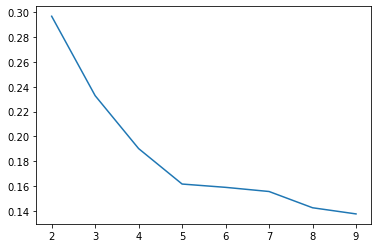

In [16]:
k_values=[]
scores=[]
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    k_values.append(k)
    scores.append(silhouette_score(X, labels))
plt.plot(k_values,scores)
plt.show()

In [18]:
kmeans = KMeans(n_clusters=3, random_state=4)
kmeans.fit(X)
labels = kmeans.labels_

In [21]:
print(normalized_mutual_info_score(labels,Y))
print(adjusted_rand_score(labels,Y))

0.04052479932846363
0.017304394539405972


In [22]:
mapping={
     'most people':3,
    'many people':2,
    'some people':1,
    'a few people':0,
    'one or two people':-1,
    'nobody':-2,
    'usually': 3,
    'often':2,
    'sometimes':1,
    'occasionally':0,
    'rarely':-1,
    'never':-2,
    'disagree':-2,
    'slightly disagree':-1,
    'neutral':0,
    'slightly agree':1,
    'agree':2
}

In [25]:
mean=[]
for i in data.index:
    s=0
    c=0
    for column in data.columns[2:]:
        val=data[column][i]
        res = re.sub(' +', ' ',val)
        res=res.lower()
        res=''.join(c for c in res if (c.isalpha()or c==' '))
        res=res.strip()
        if(i>=54 and i<=73 and not pd.isna(val)):
            s=s+int(val)
            c=c+1
        elif(res in mapping):
            s=s+mapping[res]
            c=c+1
    if(c==0):
        print(data.loc[i])
    s=s/c
    mean.append(s)

In [33]:
def compute_features(df,feature_mapping):
    X=[]
    cnt=0
    for column in df.columns[2:]:
        values=list(df[column])
        l=len(values)
        x=[]
        for i in range(l):
            value=values[i]
            res = re.sub(' +', ' ',value)
            res=res.lower()
            res=''.join(y for y in res if (y.isalpha()or y==' '))
            res=res.strip()
            if(i>=54 and i<=73 and not pd.isna(value)): 
                x.append(int(value))
            elif(res in feature_mapping):
                x.append(feature_mapping[res])
            else:
                x.append(mean[i])
        for feature in feature_titles:
            x.append(float(com[feature][cnt]))
        X.append(x)
        cnt=cnt+1
    return np.array(X)

In [34]:
X=compute_features(data,mapping)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_train)
print("Support Vector Machines: ")
print("Training accuracy: "+str(accuracy_score(y_train, y_pred)))
y_pred = svm_classifier.predict(X_test)
print("Testing accuracy: "+str(accuracy_score(y_test, y_pred)))
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)
y_pred = random_forest_classifier.predict(X_train)
print("Random Forest Classifier :")
print("Training accuracy: "+str(accuracy_score(y_train, y_pred)))
y_pred = random_forest_classifier.predict(X_test)
print("Testing accuracy: "+str(accuracy_score(y_test, y_pred)))
logistic_regression_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_classifier.fit(X_train, y_train)
y_pred = logistic_regression_classifier.predict(X_train)
print("Logistic Regression Classifier :")
print("Training accuracy: "+str(accuracy_score(y_train, y_pred)))
y_pred = logistic_regression_classifier.predict(X_test)
print("Testing accuracy: "+str(accuracy_score(y_test, y_pred)))
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_train)
print("Multi Layer Perceptron :")
print("Training accuracy: "+str(accuracy_score(y_train, y_pred)))
y_pred = mlp.predict(X_test)
print("Testing accuracy: "+str(accuracy_score(y_test, y_pred)))

Support Vector Machines: 
Training accuracy: 0.7587386946956735
Testing accuracy: 0.7978021978021979
Random Forest Classifier :
Training accuracy: 1.0
Testing accuracy: 0.8593406593406593
Logistic Regression Classifier :
Training accuracy: 0.7206062087509166
Testing accuracy: 0.7274725274725274
Multi Layer Perceptron :
Training accuracy: 0.995600097775605
Testing accuracy: 0.7912087912087912
